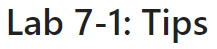

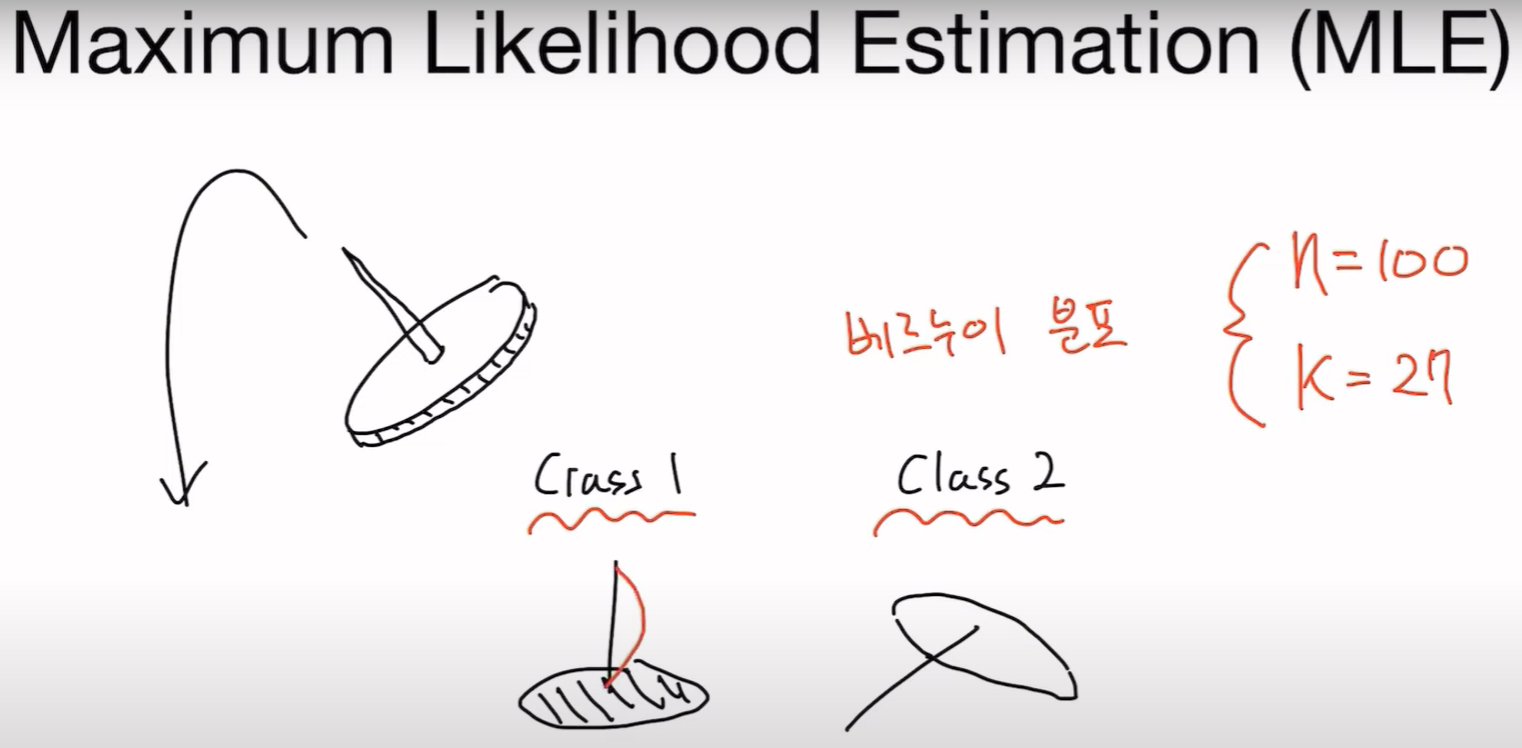

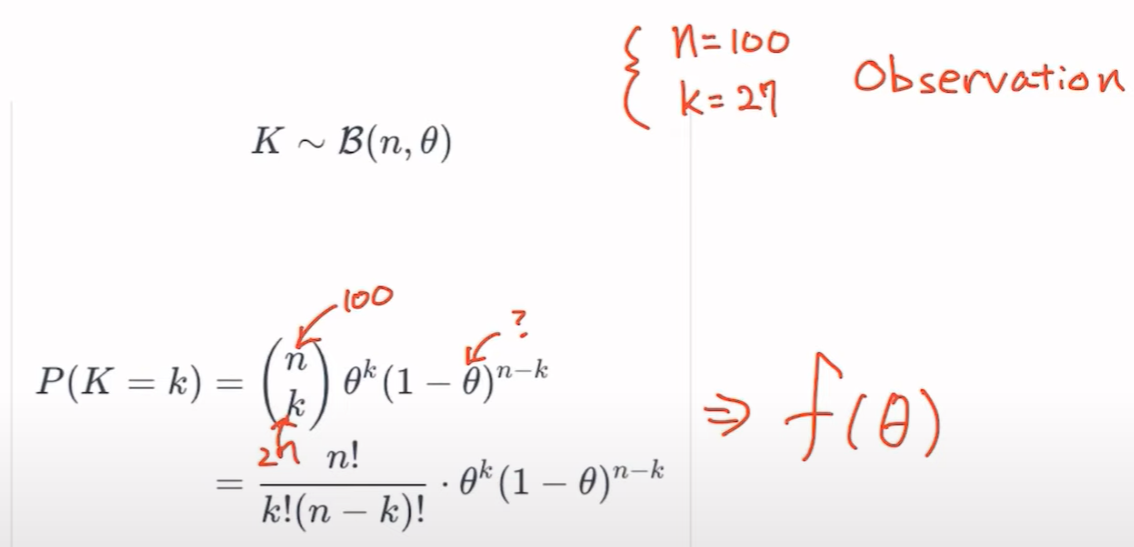

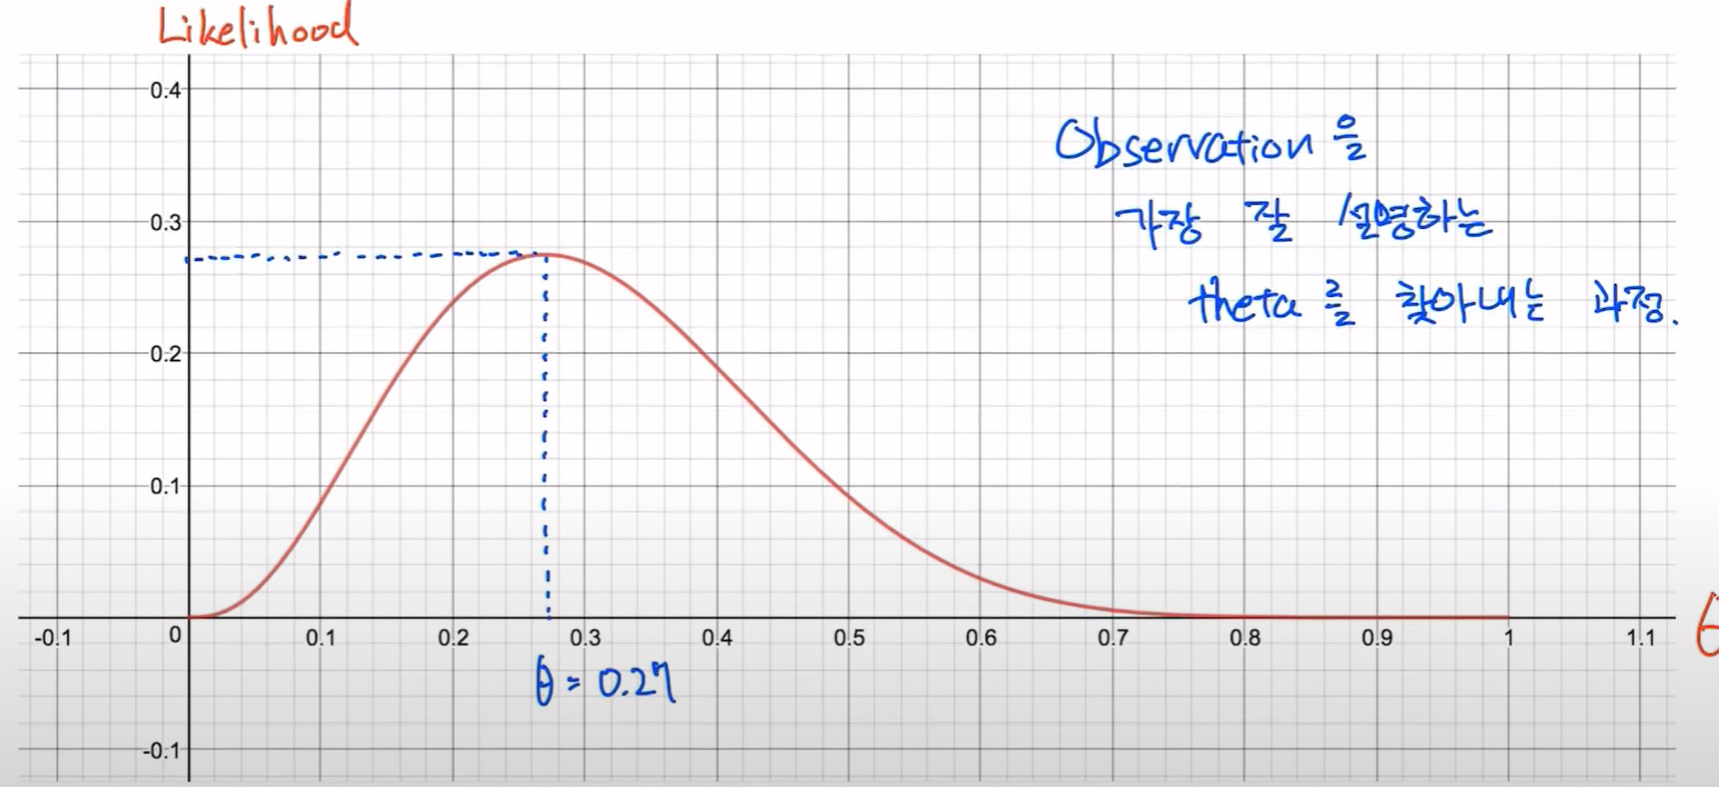

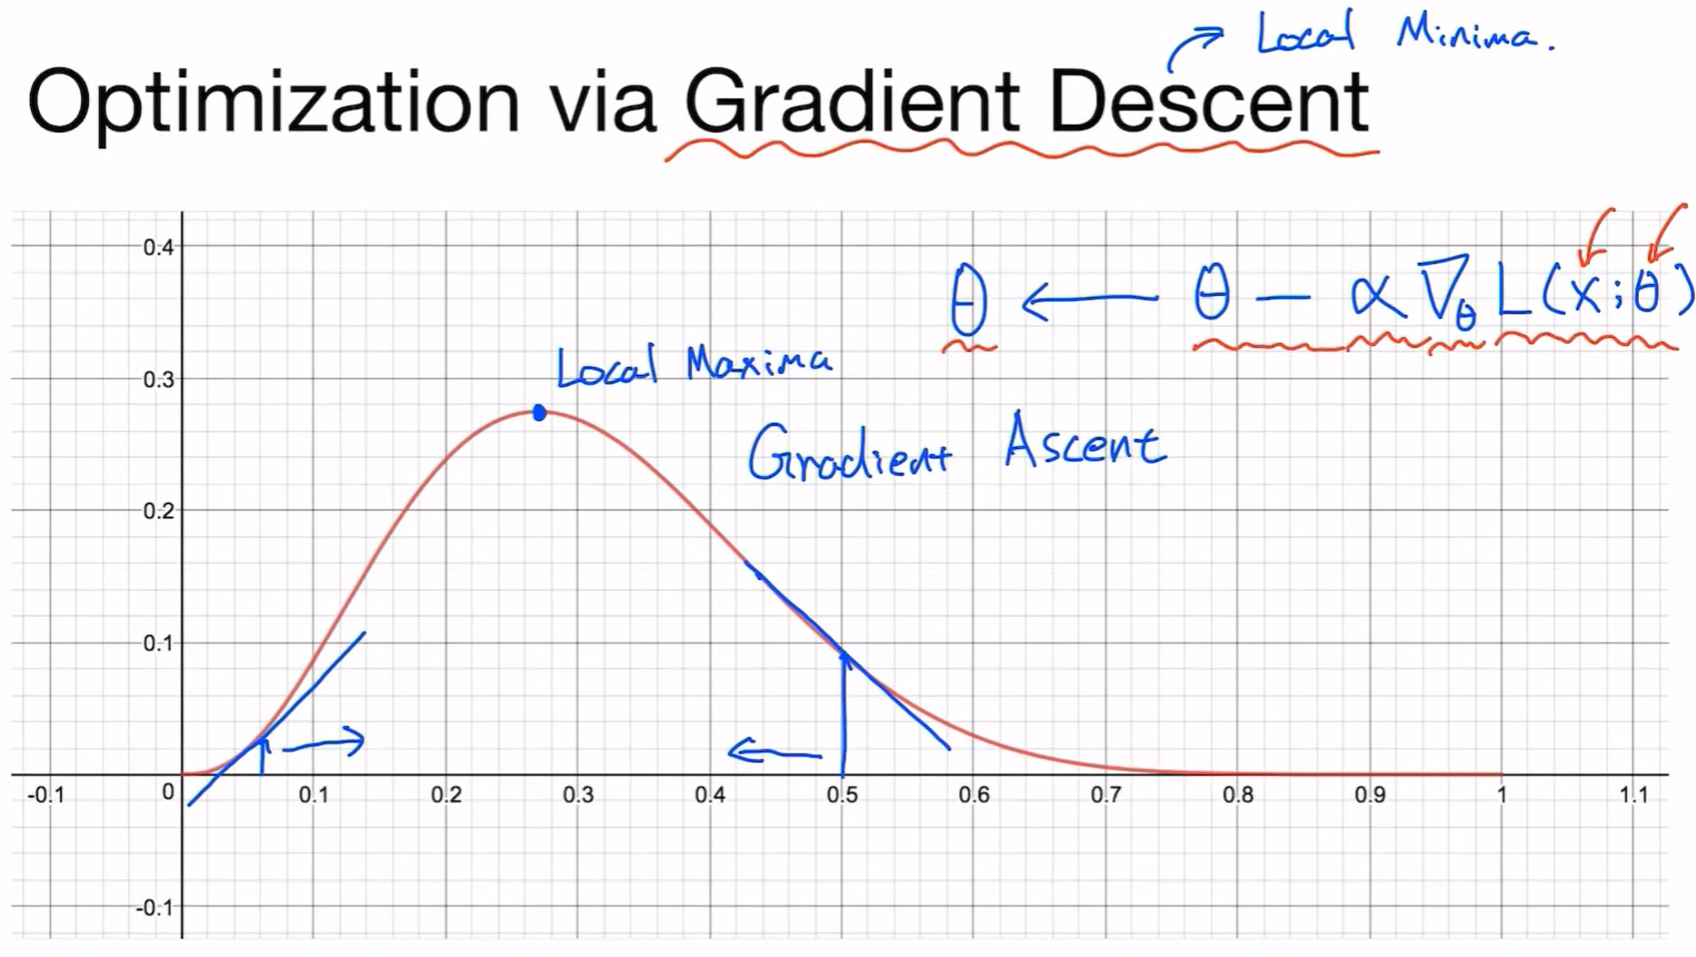

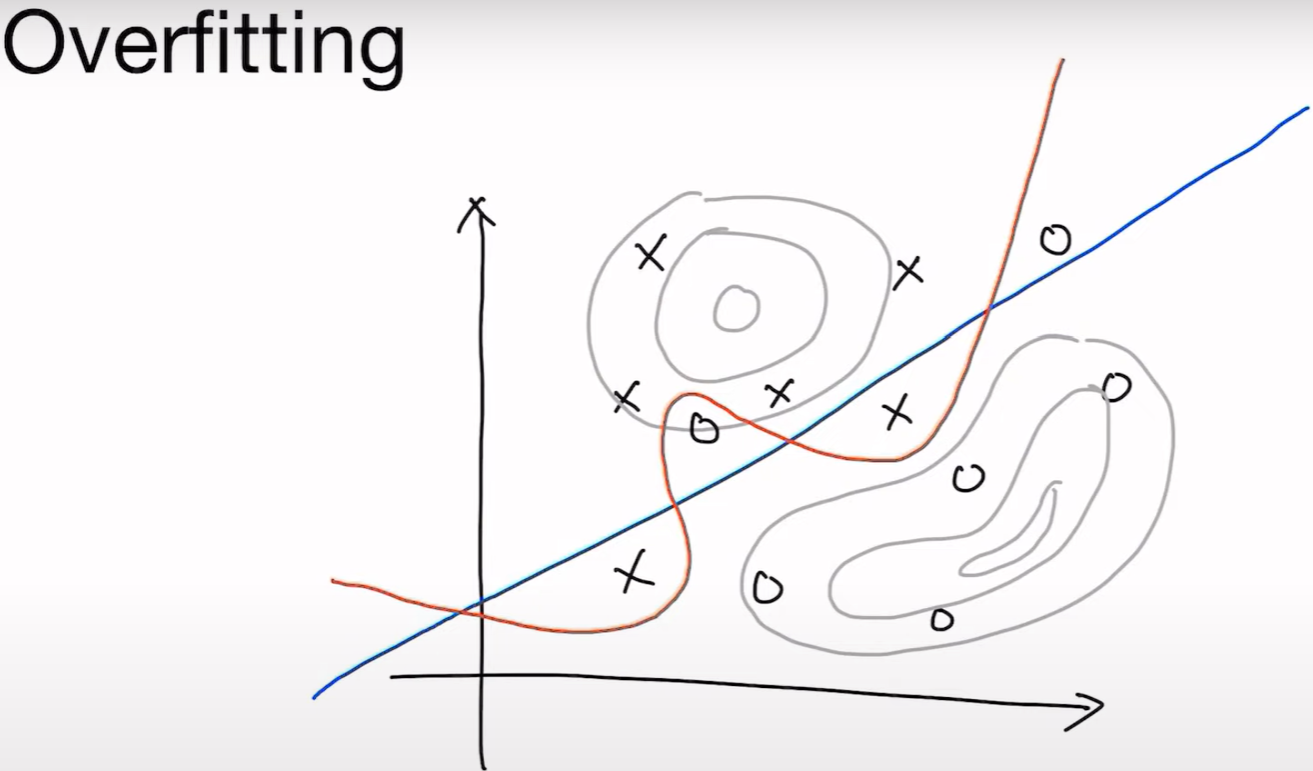

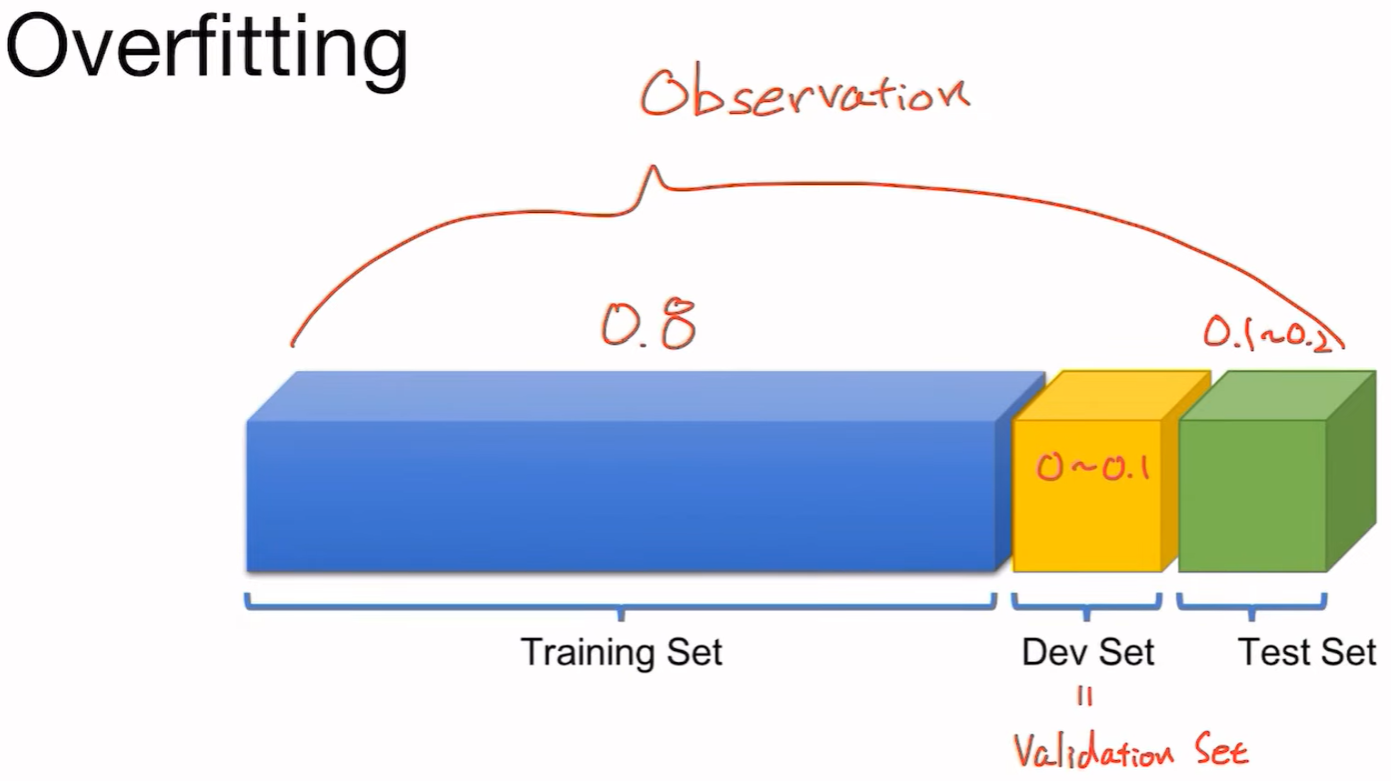

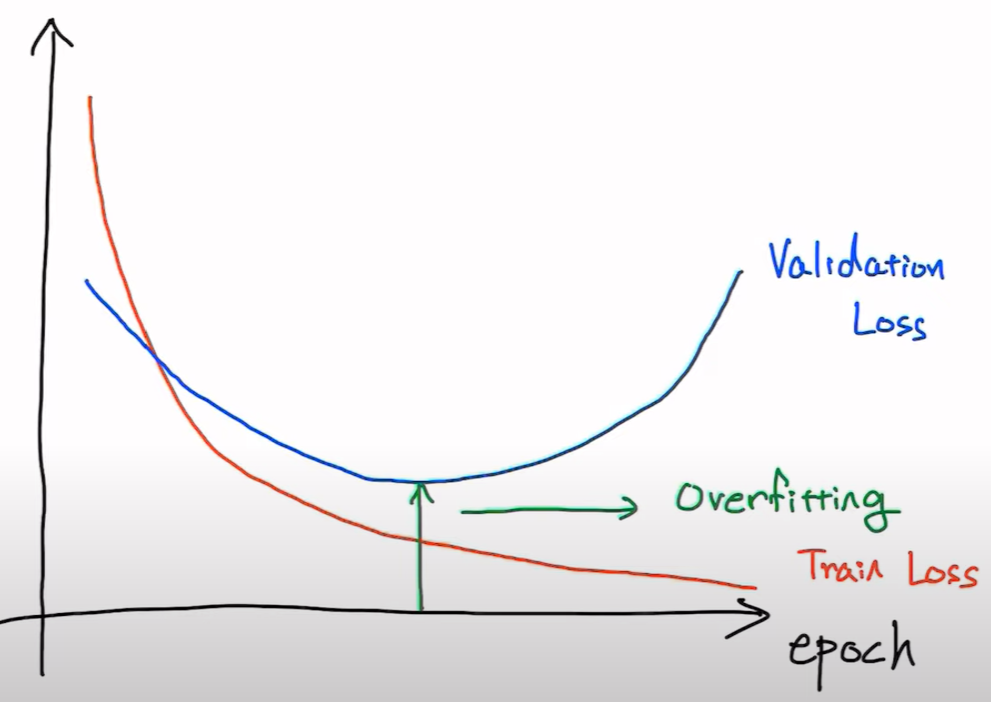

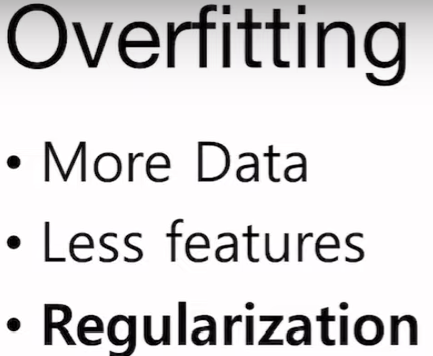      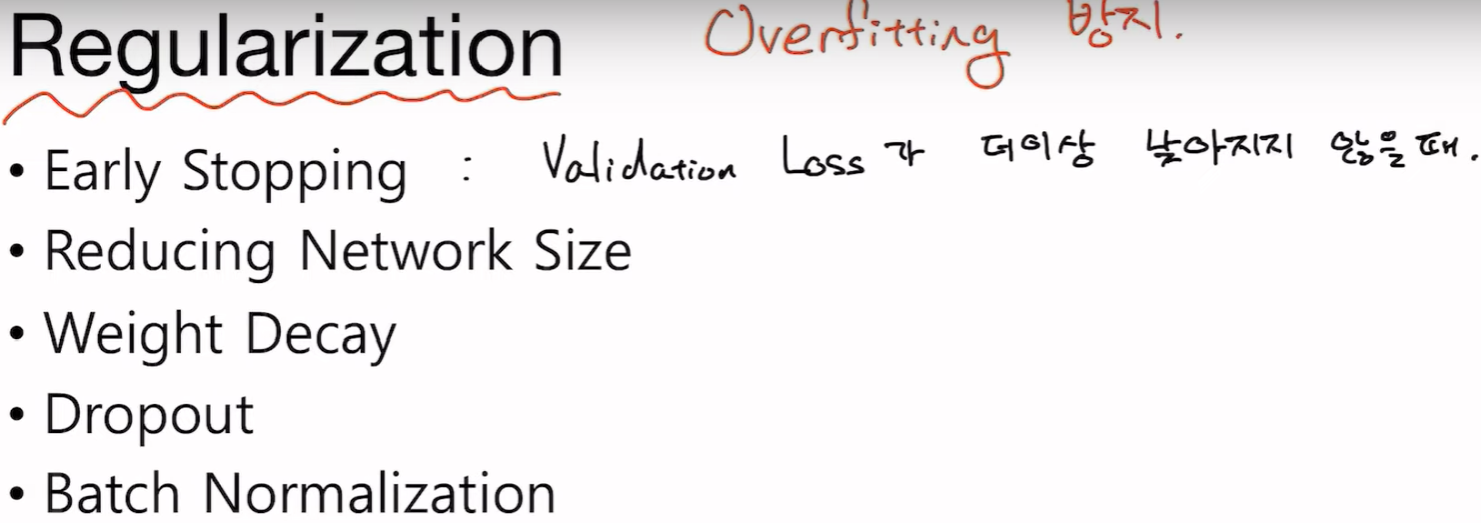

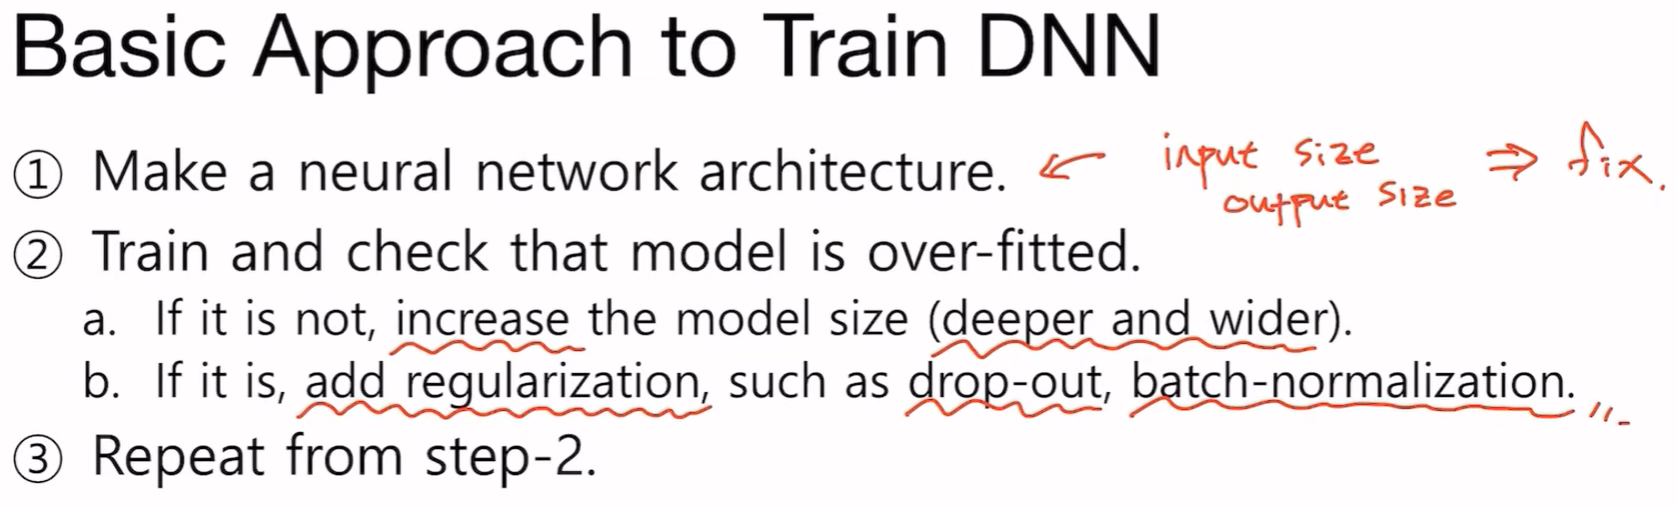

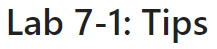

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 

torch.manual_seed(1)

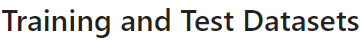

In [25]:
x_train = torch.FloatTensor([[1, 2, 1],             #(m, 3)
                             [1, 3, 2],
                             [1, 3, 4],
                             [1, 5, 5],
                             [1, 7, 5],
                             [1, 2, 5],
                             [1, 6, 6],
                             [1, 7, 7]
                            ])                          
y_train = torch.LongTensor([2, 2, 2, 1, 1, 1, 0, 0])        #(m,)

x_test = torch.FloatTensor([[2, 1, 1], [3, 1, 2], [3, 3, 4]])   #(m', 3)
y_test = torch.LongTensor([2, 2, 2])        #(m',)

In [26]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 3)
    
    def forward(self, x):
        return self.linear(x)       #(m, 3)

model = SoftmaxClassifierModel()

#optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        #H(x) 계산
        prediction = model(x_train)     #x_train : (m,3) , prediction : (m,3)

        #cost 계산
        cost = F.cross_entropy(prediction, y_train)     #y_train(m,)

        #cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

def test(model, optimizer, x_test, y_test):
    prediction = model(x_test)                  #(m',3)
    predicted_classes = prediction.max(1)[1]
    correct_count = (predicted_classes == y_test).sum().item()
    cost = F.cross_entropy(prediction, y_test)

    print('Accuracy: {}% Cost: {:.6f}'.format(
         correct_count / len(y_test) * 100, cost.item()
    ))

train(model, optimizer, x_train, y_train)
test(model, optimizer, x_test, y_test)



Epoch    0/20 Cost: 2.203667
Epoch    1/20 Cost: 1.199645
Epoch    2/20 Cost: 1.142985
Epoch    3/20 Cost: 1.117769
Epoch    4/20 Cost: 1.100901
Epoch    5/20 Cost: 1.089523
Epoch    6/20 Cost: 1.079872
Epoch    7/20 Cost: 1.071320
Epoch    8/20 Cost: 1.063325
Epoch    9/20 Cost: 1.055720
Epoch   10/20 Cost: 1.048378
Epoch   11/20 Cost: 1.041245
Epoch   12/20 Cost: 1.034285
Epoch   13/20 Cost: 1.027478
Epoch   14/20 Cost: 1.020813
Epoch   15/20 Cost: 1.014279
Epoch   16/20 Cost: 1.007872
Epoch   17/20 Cost: 1.001586
Epoch   18/20 Cost: 0.995419
Epoch   19/20 Cost: 0.989365
Accuracy: 0.0% Cost: 1.425844


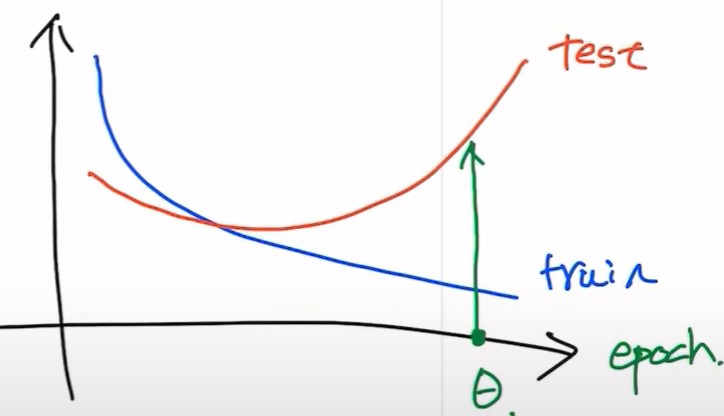

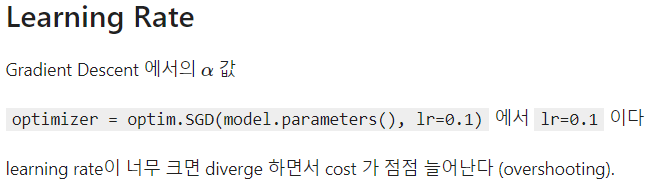

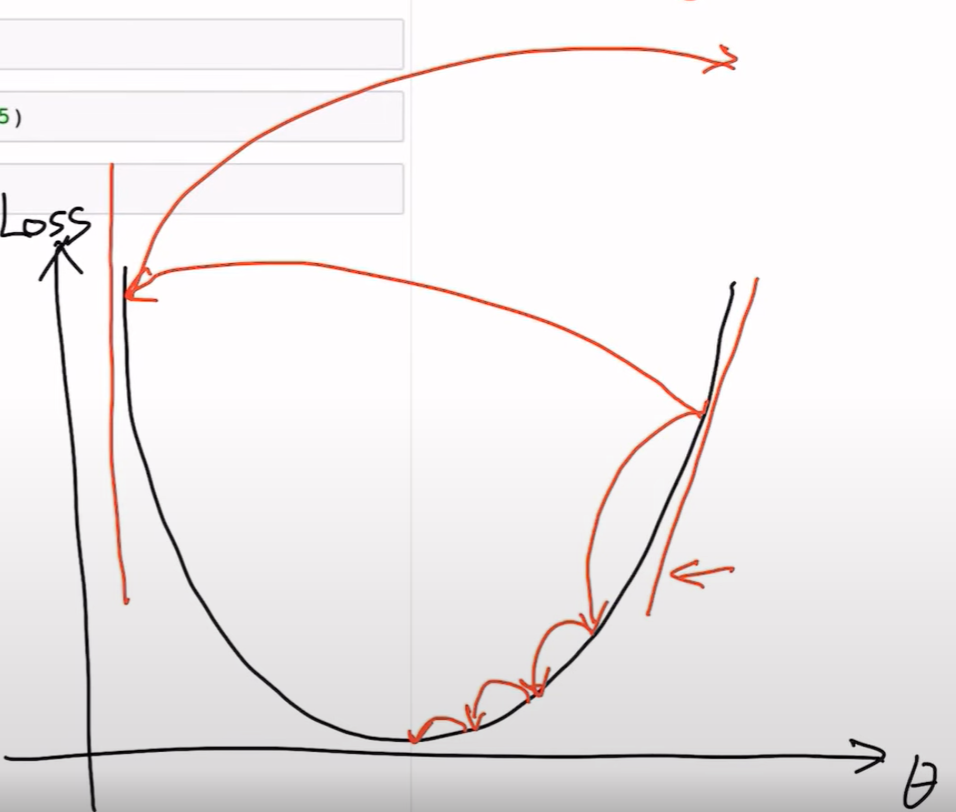

In [27]:
model = SoftmaxClassifierModel()

optimizer = optim.SGD(model.parameters(), lr=1e5)

train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 1.280268
Epoch    1/20 Cost: 976950.812500
Epoch    2/20 Cost: 1279135.125000
Epoch    3/20 Cost: 1198379.000000
Epoch    4/20 Cost: 1098825.750000
Epoch    5/20 Cost: 1968197.625000
Epoch    6/20 Cost: 284763.250000
Epoch    7/20 Cost: 1532260.125000
Epoch    8/20 Cost: 1651504.000000
Epoch    9/20 Cost: 521878.437500
Epoch   10/20 Cost: 1397263.250000
Epoch   11/20 Cost: 750986.250000
Epoch   12/20 Cost: 918691.500000
Epoch   13/20 Cost: 1487888.250000
Epoch   14/20 Cost: 1582260.125000
Epoch   15/20 Cost: 685818.062500
Epoch   16/20 Cost: 1140048.750000
Epoch   17/20 Cost: 940566.562500
Epoch   18/20 Cost: 931638.250000
Epoch   19/20 Cost: 1971322.625000


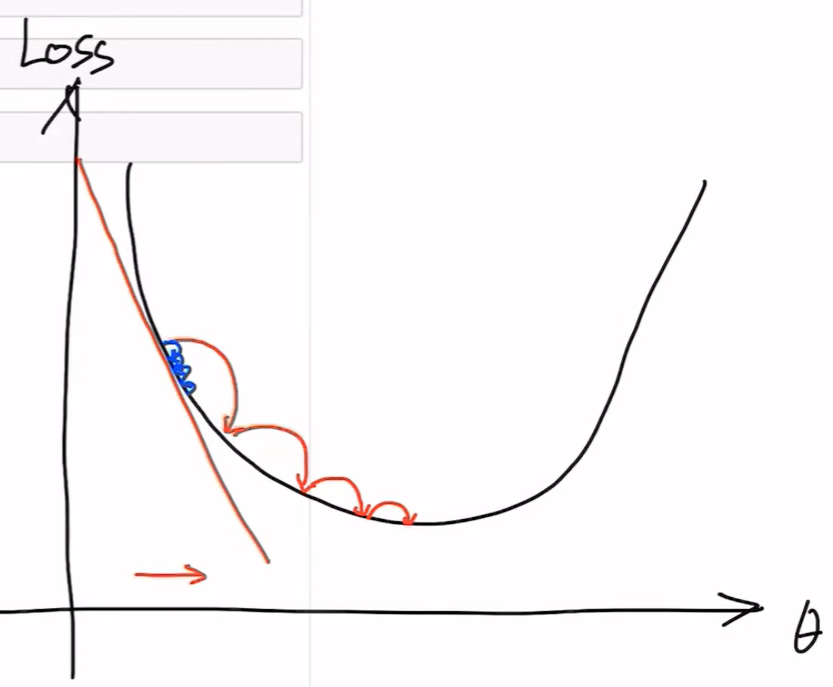

In [28]:
model = SoftmaxClassifierModel()

optimizer = optim.SGD(model.parameters(), lr=1e-10)

train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 3.187324
Epoch    1/20 Cost: 3.187324
Epoch    2/20 Cost: 3.187324
Epoch    3/20 Cost: 3.187324
Epoch    4/20 Cost: 3.187324
Epoch    5/20 Cost: 3.187324
Epoch    6/20 Cost: 3.187324
Epoch    7/20 Cost: 3.187324
Epoch    8/20 Cost: 3.187324
Epoch    9/20 Cost: 3.187324
Epoch   10/20 Cost: 3.187324
Epoch   11/20 Cost: 3.187324
Epoch   12/20 Cost: 3.187324
Epoch   13/20 Cost: 3.187324
Epoch   14/20 Cost: 3.187324
Epoch   15/20 Cost: 3.187324
Epoch   16/20 Cost: 3.187324
Epoch   17/20 Cost: 3.187324
Epoch   18/20 Cost: 3.187324
Epoch   19/20 Cost: 3.187324


In [29]:
model = SoftmaxClassifierModel()

optimizer = optim.SGD(model.parameters(), lr=1e-1)

train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 1.341574
Epoch    1/20 Cost: 1.198802
Epoch    2/20 Cost: 1.150877
Epoch    3/20 Cost: 1.131978
Epoch    4/20 Cost: 1.116242
Epoch    5/20 Cost: 1.102514
Epoch    6/20 Cost: 1.089676
Epoch    7/20 Cost: 1.077479
Epoch    8/20 Cost: 1.065775
Epoch    9/20 Cost: 1.054511
Epoch   10/20 Cost: 1.043655
Epoch   11/20 Cost: 1.033187
Epoch   12/20 Cost: 1.023091
Epoch   13/20 Cost: 1.013356
Epoch   14/20 Cost: 1.003968
Epoch   15/20 Cost: 0.994917
Epoch   16/20 Cost: 0.986189
Epoch   17/20 Cost: 0.977775
Epoch   18/20 Cost: 0.969661
Epoch   19/20 Cost: 0.961836


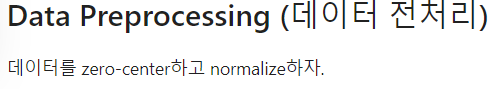

In [30]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

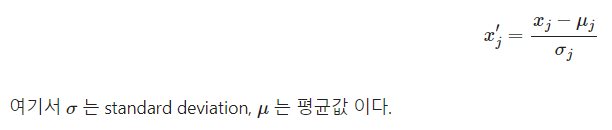

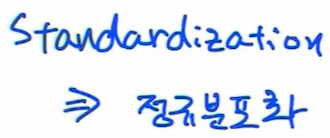

In [31]:
mu = x_train.mean(dim=0)

sigma = x_train.std(dim=0)

norm_x_train = (x_train - mu) / sigma

print(norm_x_train)

tensor([[-1.0674, -0.3758, -0.8398],
        [ 0.7418,  0.2778,  0.5863],
        [ 0.3799,  0.5229,  0.3486],
        [ 1.0132,  1.0948,  1.1409],
        [-1.0674, -1.5197, -1.2360]])


In [32]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

model = MultivariateLinearRegressionModel()

optimizer = optim.SGD(model.parameters(), lr=1e-1)

def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        #H(x) 계산
        prediction = model(x_train)     #x_train : (m,3) , prediction : (m,1)

        #cost 계산
        cost = F.mse_loss(prediction, y_train)

        #cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {: .6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

train(model, optimizer, norm_x_train, y_train)

Epoch    0/20 Cost:  29785.089844
Epoch    1/20 Cost:  18906.166016
Epoch    2/20 Cost:  12054.675781
Epoch    3/20 Cost:  7702.029785
Epoch    4/20 Cost:  4925.733398
Epoch    5/20 Cost:  3151.632812
Epoch    6/20 Cost:  2016.996094
Epoch    7/20 Cost:  1291.051270
Epoch    8/20 Cost:  826.505249
Epoch    9/20 Cost:  529.207397
Epoch   10/20 Cost:  338.934174
Epoch   11/20 Cost:  217.153564
Epoch   12/20 Cost:  139.206757
Epoch   13/20 Cost:  89.313782
Epoch   14/20 Cost:  57.375465
Epoch   15/20 Cost:  36.928429
Epoch   16/20 Cost:  23.835773
Epoch   17/20 Cost:  15.450401
Epoch   18/20 Cost:  10.077823
Epoch   19/20 Cost:  6.633700


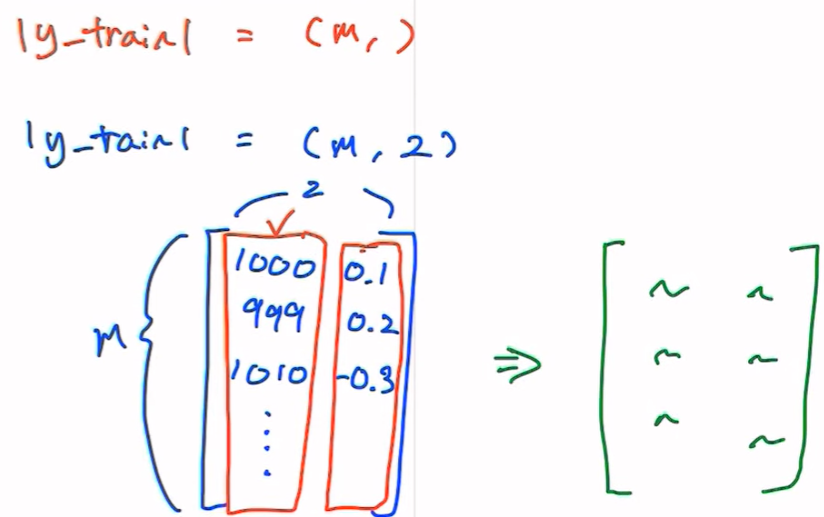

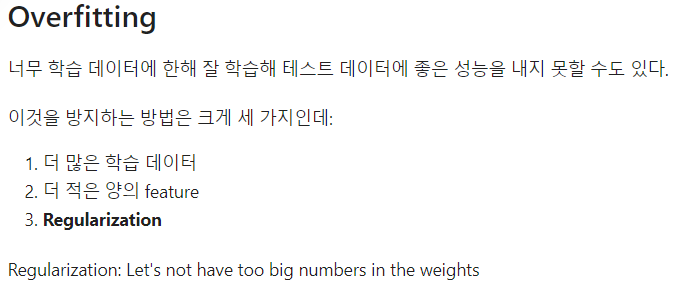

In [33]:
def train_with_regularization(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        #H(x) 계산
        prediction = model(x_train)

        #cost 계산
        cost = F.mse_loss(prediction, y_train)

        #l2 norm 계산
        l2_reg = 0
        for param in model.parameters():
            l2_reg += torch.norm(param)

        cost += l2_reg

        #cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch+1, nb_epochs, cost.item()
        ))

model = MultivariateLinearRegressionModel()

optimizer = optim.SGD(model.parameters(), lr=1e-1)

train_with_regularization(model, optimizer, norm_x_train, y_train)

Epoch    1/20 Cost: 29477.810547
Epoch    2/20 Cost: 18798.513672
Epoch    3/20 Cost: 12059.365234
Epoch    4/20 Cost: 7773.400391
Epoch    5/20 Cost: 5038.264160
Epoch    6/20 Cost: 3290.066406
Epoch    7/20 Cost: 2171.882568
Epoch    8/20 Cost: 1456.434326
Epoch    9/20 Cost: 998.598206
Epoch   10/20 Cost: 705.595215
Epoch   11/20 Cost: 518.073608
Epoch   12/20 Cost: 398.057220
Epoch   13/20 Cost: 321.242920
Epoch   14/20 Cost: 272.078247
Epoch   15/20 Cost: 240.609177
Epoch   16/20 Cost: 220.465637
Epoch   17/20 Cost: 207.570572
Epoch   18/20 Cost: 199.314804
Epoch   19/20 Cost: 194.028214
Epoch   20/20 Cost: 190.642029
